In [1]:
#!/usr/bin/python
#  -*- coding:utf-8 -*-

import numpy as np
from scipy import stats
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
def calc_statistics(x):
    n = x.shape[0]  # 样本个数

    # 手动计算
    m = 0
    m2 = 0
    m3 = 0
    m4 = 0
    for t in x:
        m += t
        m2 += t*t
        m3 += t**3
        m4 += t**4
    m /= n
    m2 /= n
    m3 /= n
    m4 /= n

    mu = m
    sigma = np.sqrt(m2 - mu*mu)
    skew = (m3 - 3*mu*m2 + 2*mu**3) / sigma**3
    kurtosis = (m4 - 4*mu*m3 + 6*mu*mu*m2 - 4*mu**3*mu + mu**4) / sigma**4 - 3
    print '手动计算均值、标准差、偏度、峰度：', mu, sigma, skew, kurtosis

    # 使用系统函数验证
    mu = np.mean(x, axis=0)
    sigma = np.std(x, axis=0)
    skew = stats.skew(x)
    kurtosis = stats.kurtosis(x)
    return mu, sigma, skew, kurtosis

[-0.70419347 -0.78784217 -0.04024682 ...,  3.59006272 -0.89001505
 -0.18283485]
手动计算均值、标准差、偏度、峰度： 0.00283574605157 1.00233756176 -0.00556844360891 -0.00340647189553
函数库计算均值、标准差、偏度、峰度： 0.00283574605157 1.00233756176 -0.00556844360891 -0.00340647189549


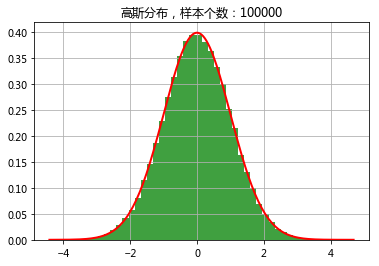

In [3]:
if __name__ == '__main__':
    d = np.random.randn(100000)
    print d
    mu, sigma, skew, kurtosis = calc_statistics(d)
    print '函数库计算均值、标准差、偏度、峰度：', mu, sigma, skew, kurtosis
    # 一维直方图
    # mpl.rcParams[u'font.sans-serif'] = 'SimHei'
    # mpl.rcParams[u'axes.unicode_minus'] = False
    y1, x1, dummy = plt.hist(d, bins=50, normed=True, color='g', alpha=0.75)
    t = np.arange(x1.min(), x1.max(), 0.05)
    y = np.exp(-t**2 / 2) / math.sqrt(2*math.pi)
    plt.plot(t, y, 'r-', lw=2)
    plt.title(u'高斯分布，样本个数：%d' % d.shape[0])
    plt.grid(True)
    plt.show()

In [5]:
d = np.random.randn(100000, 2)
    mu, sigma, skew, kurtosis = calc_statistics(d)
    print '函数库计算均值、标准差、偏度、峰度：', mu, sigma, skew, kurtosis

手动计算均值、标准差、偏度、峰度： [ 0.00163127 -0.00834052] [ 1.00109395  0.99699687] [ 0.01265127 -0.00031786] [-0.00630112  0.00323153]
函数库计算均值、标准差、偏度、峰度： [ 0.00163127 -0.00834052] [ 1.00109395  0.99699687] [ 0.01265127 -0.00031786] [-0.00630112  0.00323153]


样本总数： 100000.0


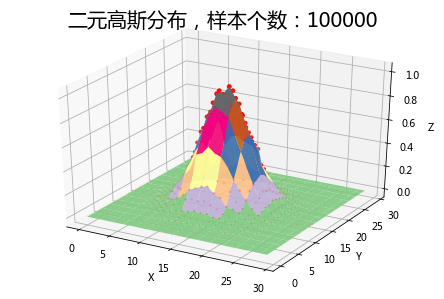

In [6]:
# 二维图像
    N = 30
    density, edges = np.histogramdd(d, bins=[N, N])
    print '样本总数：', np.sum(density)
    density /= density.max()
    x = y = np.arange(N)
    t = np.meshgrid(x, y)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(t[0], t[1], density, c='r', s=15*density, marker='o', depthshade=True)
    ax.plot_surface(t[0], t[1], density, cmap=cm.Accent, rstride=2, cstride=2, alpha=0.9, lw=0.75)
    ax.set_xlabel(u'X')
    ax.set_ylabel(u'Y')
    ax.set_zlabel(u'Z')
    plt.title(u'二元高斯分布，样本个数：%d' % d.shape[0], fontsize=20)
    plt.tight_layout(0.1)
    plt.show()